In [374]:
from pymatgen import Structure
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
from matplotlib import pyplot as plt

In [375]:
struct = Structure.from_file("RbTlO2_mp-8176_symmetrized.cif")

with MPRester("Ih2ES560GFCSedUz1") as m:

    # Band structure
    bands = m.get_bandstructure_by_material_id("mp-8176")

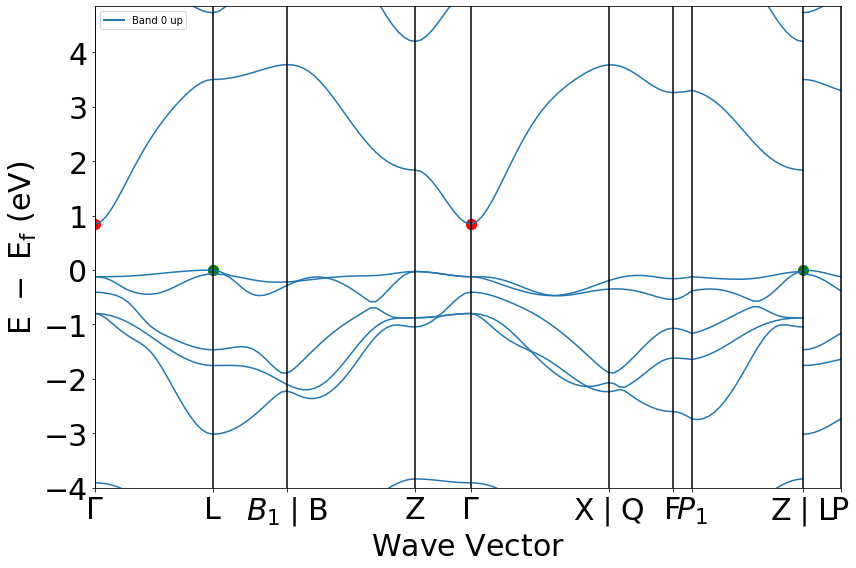

In [376]:
#Graphiqe de la structure de bandes
graph = BSPlotter(bands).get_plot(vbm_cbm_marker=True)
ax = plt.gca()
graph.show()

In [377]:
#Bande interdite
print("Direct band gap : " + str(bands.get_band_gap()['direct']) + "\nEnergy : " + 
      str(round(bands.get_band_gap()['energy'], 4)) + "[eV]" + "\nTransition : " + 
      bands.get_band_gap()['transition'] + "\n")
print("Direct band gap : " + str(round(bands.get_direct_band_gap(), 4)) + "[eV]\n")

print("Fermi energy : " + str(bands.efermi) + "[eV]")

Direct band gap : False
Energy : 0.8462[eV]
Transition : L-\Gamma

Direct band gap : 0.9683[eV]

Fermi energy : 2.73293453[eV]


Les indices correspondants à la bande de conduction sont 17, 113, 209 et 305.
Les indices correspondants à la bande de valence, ou proches, sont 15, 16, 111, 112, 207, 208, 303 et 304.


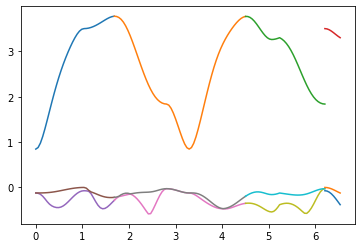

In [378]:
#Direction et dispersion (1)

#Récupération des énergies de la bande de conduction
for i in range(0,len(ax.lines)):
    line = ax.lines[i]
    yel = line.get_ydata()
    for el in yel:
        if el<4 and el>1:
            plt.plot(line.get_xdata(), line.get_ydata())
            #print(line.get_ydata())
            #print(i)
            break

print("Les indices correspondants à la bande de conduction sont 17, 113, 209 et 305.")
conduc_indices = [17, 113, 209] #305 n'étant pas intéressant pour la suite. (Les pentes pour les points les plus bas de la 1ère bande de conduction)

#Récupération des énergies de la bande de valence
for i in range(0,len(ax.lines)):
    line = ax.lines[i]
    yel = line.get_ydata()
    for el in yel:
        if el<0 and el>-0.3:
            plt.plot(line.get_xdata(), line.get_ydata())
            #print(line.get_ydata())
            #print(i)
            break
            
print("Les indices correspondants à la bande de valence, ou proches, sont 15, 16, 111, 112, 207, 208, 303 et 304.")
val_indices = [15, 16, 111, 112, 207, 208, 303, 304]

Les abscisses pour les énergies minimums sont : [0.     3.2936 6.207 ]
Les ordonnées minimums sont : [0.8462 0.8462 1.8389]
Les différentes pentes sur la première bande de conduction : [1.738  1.8218 2.4158 1.135 ]
La direction avec le plus de dispersion : Gamma - X. (Pente la plus forte, 2.416, en vert sur le graphique)
La direction la moins de dispersive : Z - P1. (Pente la plus faible, 1.135, en rouge sur le graphique)


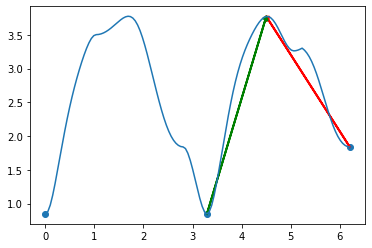

In [379]:
#Direction et dispersion (2)

#Bande de conduction

def pente(x1, x2, y1, y2):
    return abs((y2-y1)/(x2-x1))

ymins = []
xmins = []
pentes = []

#Trouver les minimum des pseudo-paraboles
for j in conduc_indices:
    yconduc = ax.lines[j].get_ydata()
    x = ax.lines[j].get_xdata()
    yminsj = []
    xminsj = []
    if yconduc[0]<yconduc[1]:  #Cas du bords gauche
        yminsj.append(yconduc[0])
        xminsj.append(x[0])
    if yconduc[len(yconduc)-1]<yconduc[len(yconduc)-2]:  #Cas du bord droit
        yminsj.append(yconduc[len(yconduc)-1])
        xminsj.append(x[len(yconduc)-1])
    for i in range(1, len(yconduc)-1):
        if yconduc[i-1]>yconduc[i] and yconduc[i]<yconduc[i+1]:
            yminsj.append(yconduc[i])
            xminsj.append(x[i])
        if yconduc[i-1]==yconduc[i]:  #Si 2 énergies se suivant sont égales
            if yconduc[i-2]>yconduc[i] and yconduc[i]<yconduc[i+1]:
                yminsj.append(yconduc[i])
                xminsj.append(x[i])
        if yconduc[i]==yconduc[i+1]:  #Si 2 énergies se suivant sont égales
            if yconduc[i-1]>yconduc[i] and yconduc[i]<yconduc[i+2]:
                yminsj.append(yconduc[i])
                xminsj.append(x[i])
    yminj = yminsj[0]
    xminj = xminsj[0]
    if len(yminsj)>1:  #On retient uniquement le creux de la pseudo-parabole.    
        for k in range(1, len(yminsj)):
            if yminsj[k]<yminj:
                yminj = yminsj[k]
                xminj = xminsj[k]
    
    ymins.append(yminj)
    xmins.append(xminj)
    
    #Obtenir les pentes
    imini = np.where(x == xminj)[0]
    if len(imini)==1:
        pos = imini[0]
        if pos != len(x)-1:
            pentes.append(pente(x[pos], x[-1], yconduc[pos], yconduc[-1]))
        if pos != 0:
            pentes.append(pente(x[pos], x[0], yconduc[pos], yconduc[0]))
    if len(imini)==2:
        pos = imini[0]
        if pos != 0:
            pentes.append(pente(x[pos], x[0], yconduc[pos], yconduc[0]))
        pos = imini[1]
        if pos != len(x)-1:
            pentes.append(pente(x[pos], x[-1], yconduc[pos], yconduc[-1]))

yconduc = np.concatenate((ax.lines[17].get_ydata(), ax.lines[113].get_ydata(), ax.lines[209].get_ydata()))
x = np.concatenate((ax.lines[17].get_xdata(), ax.lines[113].get_xdata(), ax.lines[209].get_xdata()))

#Pente la plus faible
yconducf1 = ax.lines[209].get_ydata()[-1]
xf1 = ax.lines[209].get_xdata()[-1]
dyconducf1 = ax.lines[209].get_ydata()[0] - yconducf1
dxf1 = ax.lines[209].get_xdata()[0] - xf1

plt.plot(x, yconduc)
plt.arrow(xf1, yconducf1, dxf1, dyconducf1, head_width=0.1, head_length=0.05, linewidth=2, color='r', length_includes_head=True)
plt.scatter(xmins, ymins)

#Pente la plus Forte
yF = ax.lines[113].get_ydata()
xF = ax.lines[113].get_xdata()
#print(np.where(xF == xmins[1])[0])
yconducF1 = yF[35]
xF1 = xF[35]
dyconducF1 = yF[-1] - yconducF1
dxF1 = xF[-1] - xF1
#print(dxF1, dyconducF1) -> pour le calcul de masse effective

plt.arrow(xF1, yconducF1, dxF1, dyconducF1, head_width=0.1, head_length=0.05, linewidth=2, color='g', length_includes_head=True)

        
print("Les abscisses pour les énergies minimums sont : " + str(np.round(xmins, 4)))
print("Les ordonnées minimums sont : " + str(np.round(ymins, 4)))
    
print("Les différentes pentes sur la première bande de conduction : " + str(np.round(pentes, 4)))

print("La direction avec le plus de dispersion : Gamma - X. (Pente la plus forte, 2.416, en vert sur le graphique)")
print("La direction la moins de dispersive : Z - P1. (Pente la plus faible, 1.135, en rouge sur le graphique)")

Les abscisses pour les énergies maximums sont : [1.0357 2.8075 2.8075 6.207 ]
Les ordonnées maximums sont : [ 0.     -0.0273 -0.0273  0.    ]
Les différentes pentes sur la dernière bande de valence : [0.1179 0.4054 0.1601 1.426  0.3536 0.2889 0.3743]
La direction avec le plus de dispersion : Z - B. (Pente la plus forte, 1.426, en vert sur le graphique)
La direction la moins de dispersive : B1 - L. (Pente la plus faible, 0.118, en rouge sur le graphique)


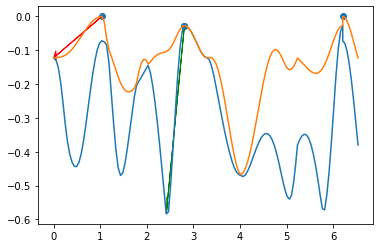

In [380]:
#Direction et dispersion (3)

#Bande de valence

ymaxs = []
xmaxs = []
pentes = []

#Trouver les maximum des pseudo-paraboles
for j in val_indices:
    yval = ax.lines[j].get_ydata()
    x = ax.lines[j].get_xdata()
    ymaxsj = []
    xmaxsj = []
    if yval[0]>yval[1]:  #Cas du bords gauche
        ymaxsj.append(yval[0])
        xmaxsj.append(x[0])
    if yval[len(yval)-1]>yval[len(yval)-2]:  #Cas du bord droit
        ymaxsj.append(yval[len(yval)-1])
        xmaxsj.append(x[len(yval)-1])
    for i in range(1, len(yval)-1):
        if yval[i-1]<yval[i] and yval[i]>yval[i+1]:
            ymaxsj.append(yval[i])
            xmaxsj.append(x[i])
        if yval[i-1]==yval[i]:  #Si 2 énergies se suivant sont égales
            if yval[i-2]<yval[i] and yval[i]>yval[i+1]:
                ymaxsj.append(yval[i])
                xmaxsj.append(x[i])
        if yval[i]==yval[i+1]:  #Si 2 énergies se suivant sont égales
            if yval[i-1]<yval[i] and yval[i]>yval[i+2]:
                ymaxsj.append(yval[i])
                xmaxsj.append(x[i])
    ymaxj = ymaxsj[0]
    xmaxj = xmaxsj[0]
    if len(ymaxsj)>1:  #On retient uniquement le sommet de la pseudo-parabole.    
        for k in range(1, len(ymaxsj)):
            if ymaxsj[k]>ymaxj:
                ymaxj = ymaxsj[k]
                xmaxj = xmaxsj[k]
    
    ymaxs.append(ymaxj)
    xmaxs.append(xmaxj)

yval = np.concatenate((ax.lines[15].get_ydata(), ax.lines[111].get_ydata(), ax.lines[207].get_ydata(), 
                       ax.lines[303].get_ydata()))
x = np.concatenate((ax.lines[15].get_xdata(), ax.lines[111].get_xdata(), ax.lines[207].get_xdata(), 
                    ax.lines[303].get_xdata()))

plt.plot(x, yval)

yval2 = np.concatenate((ax.lines[16].get_ydata(), ax.lines[112].get_ydata(), ax.lines[208].get_ydata(), 
                       ax.lines[304].get_ydata()))
x2 = np.concatenate((ax.lines[16].get_xdata(), ax.lines[112].get_xdata(), ax.lines[208].get_xdata(), 
                     ax.lines[304].get_xdata()))

plt.plot(x2, yval2)

#Suppression des points qui ne se trouvent pas sur la plus haute bande de valence
#plt.scatter(xmaxs, ymaxs)
del xmaxs[0]
del ymaxs[0]
del xmaxs[-2]
del ymaxs[-2]
del xmaxs[-2]
del ymaxs[-2]
del xmaxs[-2]
del ymaxs[-2]
plt.scatter(xmaxs, ymaxs)


#Obtenir les pentes
#print(x,yval)
#print(x2,yval2)
pentes.append(pente(xmaxs[0], x2[0], ymaxs[0], yval2[0]))
#print(np.where((yval2 < -0.2228) & (yval2 > -0.223)))  #-> indice 33
pentes.append(pente(xmaxs[0], x2[33], ymaxs[0], yval2[33]))
pentes.append(pente(xmaxs[1], x2[33], ymaxs[1], yval2[33]))
#print(np.where((yval < -0.58)))  #-> indice 51
pentes.append(pente(xmaxs[1], x[51], ymaxs[1], yval[51]))
#print(np.where((yval < -0.4731) & (yval > -0.4733)))  #-> indice 87
pentes.append(pente(xmaxs[1], x[87], ymaxs[1], yval[87]))  # Pente +- égale celle partant du même point et arrivant 
                                            # au creux orange situé au même endroit. (pente ni minimum, ni maximum 
                                            #-> pas intéressant de calculer pour l'orange.)
#print(np.where((yval2 < -0.1683) & (yval2 > -0.1685)))  #-> indice 123
pentes.append(pente(xmaxs[3], x2[123], ymaxs[3], yval2[123]))
pentes.append(pente(xmaxs[3], x2[-1], ymaxs[3], yval2[-1]))
#plt.scatter(x2[123], yval2[123]) #-> Pour visualiser sur le graphe si les indices correspondent bien.



#Pente la plus faible
yvalf1 = ymaxs[0]
xf1 = xmaxs[0]
dyvalf1 = ax.lines[15].get_ydata()[0] - yvalf1
dxf1 = ax.lines[15].get_xdata()[0] - xf1
#print(dxf1, dyvalf1) #-> Pour le calcul de masse effective


plt.arrow(xf1, yvalf1, dxf1, dyvalf1, head_width=0.03, head_length=0.05, linewidth=1, color='r', 
          length_includes_head=True)


#Pente la plus Forte
yvalF1 = ymaxs[1]
xF1 = xmaxs[1]
dyvalF1 = yval[51] - yvalF1
dxF1 = x[51] - xF1

plt.arrow(xF1, yvalF1, dxF1, dyvalF1, head_width=0.03, head_length=0.05, linewidth=1, color='g', 
          length_includes_head=True)
        
print("Les abscisses pour les énergies maximums sont : " + str(np.round(xmaxs, 4)))
print("Les ordonnées maximums sont : " + str(np.round(ymaxs, 4)))
    
print("Les différentes pentes sur la dernière bande de valence : " + str(np.round(pentes, 4)))

print("La direction avec le plus de dispersion : Z - B. (Pente la plus forte, 1.426, en vert sur le graphique)")
print("La direction la moins de dispersive : B1 - L. (Pente la plus faible, 0.118, en rouge sur le graphique)")

In [392]:
#Masse effective à la base de la première bande de conduction
hbar = 1.054571818*10**(-34)
me = 9.1093826*10**(-31)

#Si l'on récupère la direction Gamma - X calculé précédemment, on a un delta y de 2.925 pour un delta x de 1.21
#On peut donc résoudre l'équation classique d'une parabole : y=ax^2
a = 2.925/1.21**2
print("a = hbar^2 / (2 * m*) = " + str(round(a,4)))
#On obtient alors la masse effective
m = hbar/(2*a)
print("Masse effective : m* = " + str(round(m*1e+35,4)) + "*10^-35 [kg] = " + str(round(m/me, 5)) + " [me]")




a = hbar^2 / (2 * m*) = 1.9978
Masse effective : m* = 2.6393*10^-35 [kg] = 3e-05 [me]


In [393]:
#Masse effective au sommet de la dernière bande de valence

#De la même manière que pour la 1ère bande de conduction :
#On reprend la direction L - Gamma : delta y = 0.1221 et delta x = 1.0357
a = 0.1221/1.0357**2
print("a = hbar^2 / (2 * m*) = " + str(round(a,4)))
#On obtient alors la masse effective
m = hbar/(2*a)
print("Masse effective : m* = " + str(round(m*1e+35,4)) + "*10^-35 [kg] = " + str(round(m/me, 5)) + " [me]")

a = hbar^2 / (2 * m*) = 0.1138
Masse effective : m* = 46.3232*10^-35 [kg] = 0.00051 [me]
